# Chapter 1 

## Exercise 2

This simple data analysis pipeline uses a [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) model to classify flowers from the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

Questions:

1. Look through the example pipeline. Mark which cells belong to which categories in this categorization:
    - Data preparation and loading
    - Modeling
    - Evaluation
    - Presentation
2. Try to determine the pieces of the code that are **unique** to this specific dataset. Discuss how you would generalize this pipeline to other datasets.

In [18]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

Train split proportions:
Target
setosa        40
versicolor    39
virginica     41
dtype: int64
Test split proportions:
Target
setosa        10
versicolor    11
virginica      9
dtype: int64
|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.70
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.95
|   |   |   |--- Petal.Width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- Petal.Width >  1.55
|   |   |   |   |--- Sepal.Length <= 6.60
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- Sepal.Length >  6.60
|   |   |   |   |   |--- class: virginica
|   |--- Petal.Width >  1.70
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- Sepal.Length <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- Sepal.Length >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica

Confusion matrix:
 [[10  0  0]
 [ 0 10

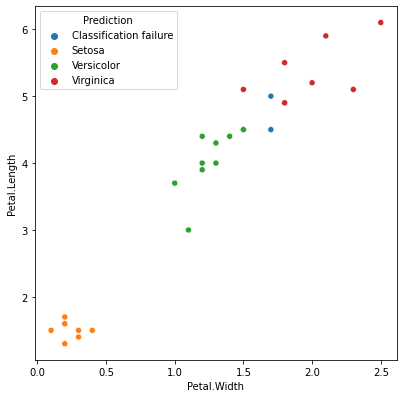

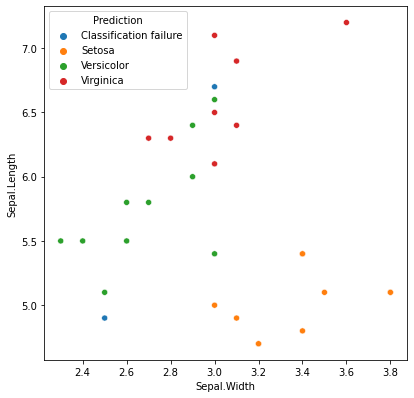

In [37]:
# Define iris loading function
def load_iris(iris_data_file):
    iris_data = pd.read_csv(
        iris_data_file,
        names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'],
    )
    iris_data['Species'] = iris_data['Species'].map(lambda x: x.replace('Iris-','')).astype('category')
    iris_data = iris_data.rename(columns={'Species':'Target'})
    return iris_data

def shuffle_rows(data, random_state=None):
    shuffled_data = data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    return shuffled_data

def split_dataset(data, train_fraction=0.8,random_state=None):
    train_split, test_split = train_test_split(data, train_size=train_fraction, random_state=random_state)
    print('Train split proportions:')
    print(train_split.groupby('Target').size())
    print('Test split proportions:')
    print(test_split.groupby('Target').size())
    return (train_split, test_split)

def decision_tree_classifier(train_data, random_state=None):
    tree = DecisionTreeClassifier(random_state=random_state)
    train_data = train_split.drop('Target', axis=1)
    train_target = train_split['Target']
    fitted_tree = tree.fit(train_data, train_target)
    print(export_text(fitted_tree, feature_names=list(train_data.columns)))
    return(fitted_tree)

def prediction_evaluation(test_data, model):
    test_data = test_split.drop('Target', axis=1)
    test_target = test_split['Target']
    result_data = test_split.copy()
    result_data['PredictedValue'] = fitted_tree.predict(test_data)
    result_data['Prediction'] = result_data.apply(lambda x: x['Target'].capitalize() if x['Target'] == x['PredictedValue'] else 'Classification failure', axis=1)
    print('Confusion matrix:\n', confusion_matrix(result_data['PredictedValue'], result_data['Target']))
    print('Accuracy: ', accuracy_score(result_data['PredictedValue'], result_data['Target']))
    return result_data

def plot_predictions(fitted_data, x, y):
    petal_plot, petal_plot_ax = plt.subplots(figsize=(6.5, 6.5))
    sb.scatterplot(x=x, y=y, data=fitted_data, hue=fitted_data['Prediction'])

random_state = RandomState(seed=42)
dataset = load_iris('../data/iris.data')
dataset = shuffle_rows(dataset, random_state)
train_split, test_split = split_dataset(dataset, train_fraction=0.8, random_state=random_state)
fitted_tree = decision_tree_classifier(train_split, random_state=random_state)
predicted_data = prediction_evaluation(test_split, fitted_tree)
plot_predictions(predicted_data, 'Petal.Width', 'Petal.Length')
plot_predictions(predicted_data, 'Sepal.Width', 'Sepal.Length')